In [1]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scripts.afilter as afilter
import scripts.sigutil as util
import importlib
import librosa

In [ ]:
importlib.reload(afilter)
importlib.reload(util)

### Load voice recorded data

In [44]:
fs, d, d_norm = util.read_normalized('data/2_RecChanging.wav')
_, x, x_norm = util.read_normalized('data/2_Sig.wav')

In [46]:
print(d_norm)

[-0.0003357  -0.000824   -0.00039674 ... -0.0013123  -0.00122074
 -0.00161748]


In [ ]:
print("Source signal corrupted by ambient noise:")
IPython.display.Audio(d, rate=fs)

### Load music + noise data

In [57]:
fs = 8000 # Hz

cleanSig, _ = librosa.load('data/3_CleanGuitar.wav', sr=fs) # Downsample to fs 
noise, _ = librosa.load('data/talkingNoise.wav', sr=fs)

In [90]:
length = min(len(cleanSig), len(noise))

x = noise[:length]*0.06 # Attenuate because this noise file is too loud
d = cleanSig[:length] + x

In [91]:
print("Signal corrupted with noise")
IPython.display.Audio(d, rate=fs)

Signal corrupted with noise


In [92]:
print("Noise")
IPython.display.Audio(x, rate=fs)

Noise


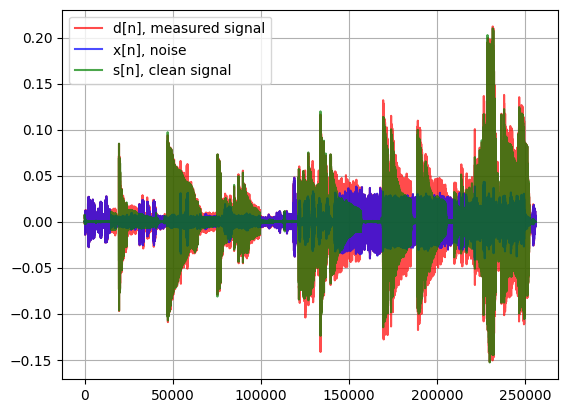

In [93]:
plt.plot(d, color='red', label='d[n], measured signal', alpha=0.7)
plt.plot(x, color='blue', label='x[n], noise', alpha=0.7)
plt.plot(cleanSig, color='green', label='s[n], clean signal', alpha=0.7)
plt.legend()
plt.grid()
plt.show()

### Create simulated data

### LMS

In [17]:
def plot_adaptive(i, sig):
    if (i - 2*fs) % (7*fs) == 0 and i > 10*fs:
        plt.title(f'Room impulse response at {i/fs} s')
        plt.plot(sig[::-1])
        plt.show()

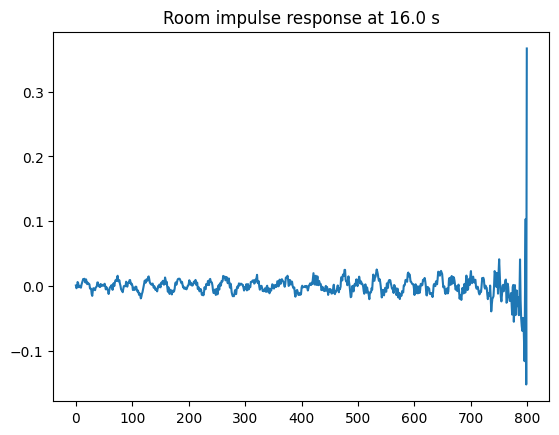

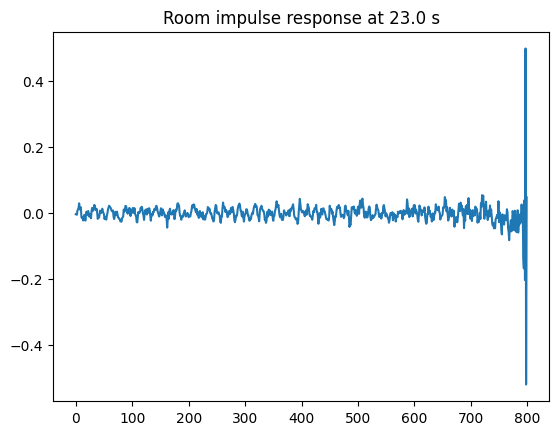

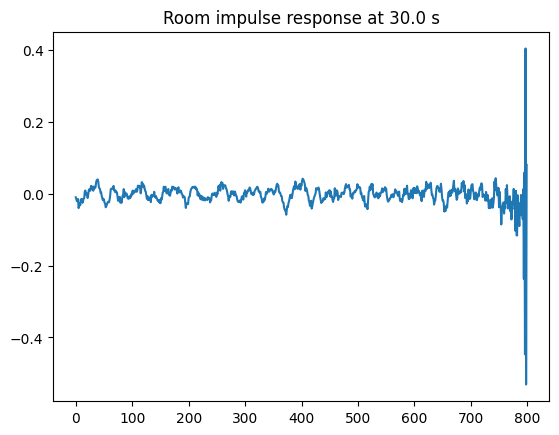

In [72]:
# Choose 0 < mu < 2/lambdaMax. Problem: cannot really estimate lambda_max at this stage
mu = 0.03  # choose mu intuitively

# Apply the iteration
K = 800  # number of taps
N_it = 20  # number of iterations

f_ad_lms, e_ad_lms = afilter.adaptive_filter(x, d, K, N_it, 
                                    algoType='LMS', mu=mu, callback=plot_adaptive)

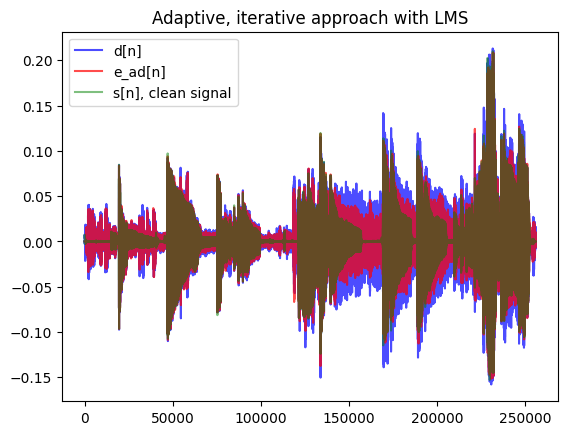

In [74]:
plt.title('Adaptive, iterative approach with LMS')
plt.plot(d, color='blue', label='d[n]', alpha=0.7)
plt.plot(e_ad_lms, color='red', label='e_ad[n]', alpha=0.7)
plt.plot(cleanSig, color='green', label='s[n], clean signal', alpha=0.5)
plt.legend()

In [20]:
print('Denoised signal')
IPython.display.Audio(e_ad_lms, rate=fs)

In [ ]:
print("Signal corrupted with noise")
IPython.display.Audio(d, rate=fs)

In [ ]:
print("Clean Signal")
IPython.display.Audio(cleanSig, rate=fs)

### NLMS

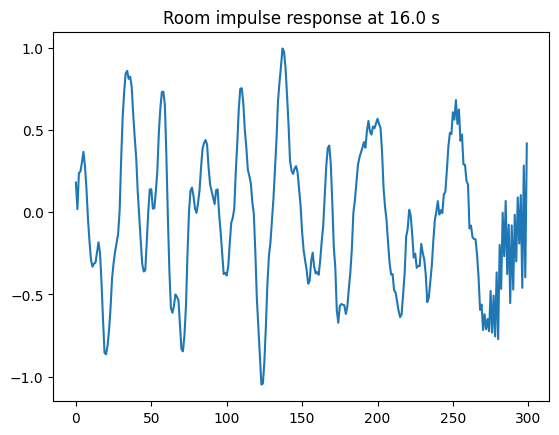

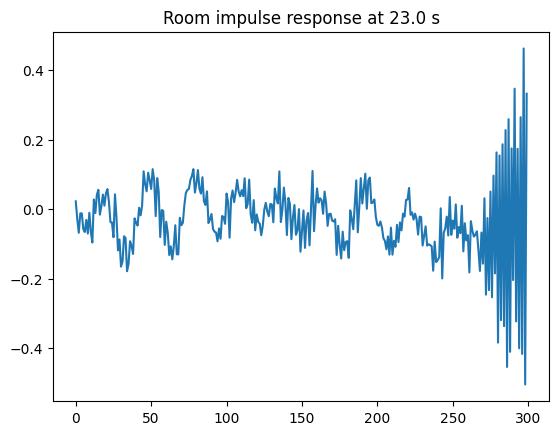

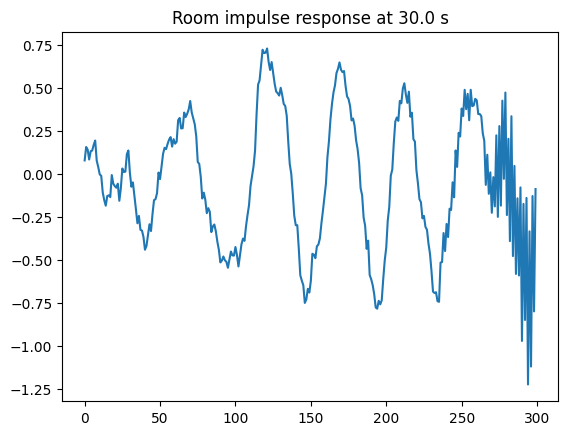

In [98]:
mu = 1  # needs to be between 0 and 2

# Apply the iteration
K = 300  # number of taps
N_it = 15  # number of iterations

f_ad_nlms, e_ad_nlms = afilter.adaptive_filter(x, d, K, N_it, 
                                    algoType='NLMS', mu=mu, callback=plot_adaptive)

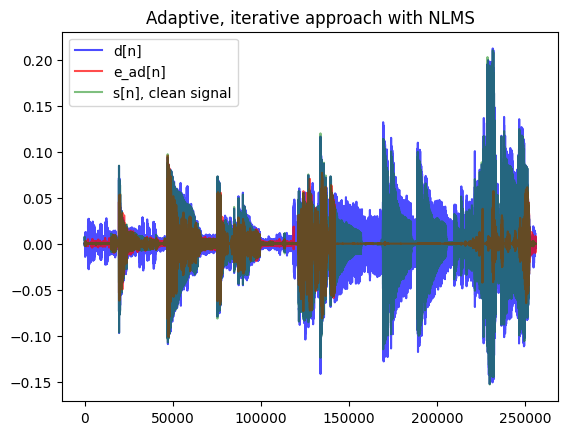

In [99]:
plt.title('Adaptive, iterative approach with NLMS')
plt.plot(d, color='blue', label='d[n]', alpha=0.7)
plt.plot(e_ad_nlms, color='red', label='e_ad[n]', alpha=0.7)
plt.plot(cleanSig, color='green', label='s[n], clean signal', alpha=0.5)
plt.legend()

In [77]:
print('Denoised signal')
IPython.display.Audio(e_ad_nlms, rate=fs)

Denoised signal


In [40]:
print("Signal corrupted with noise")
IPython.display.Audio(d, rate=fs)

Signal corrupted with noise


In [ ]:
print("Clean Signal")
IPython.display.Audio(cleanSig, rate=fs)

### RLS

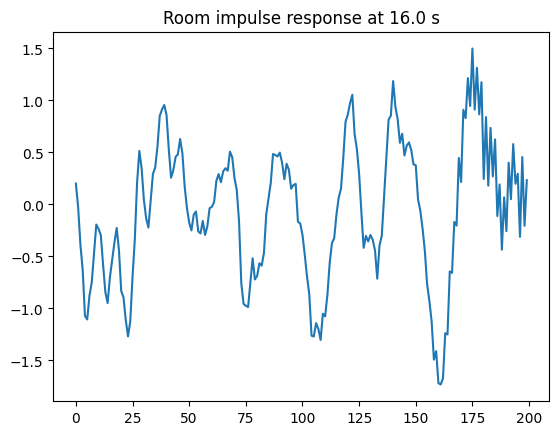

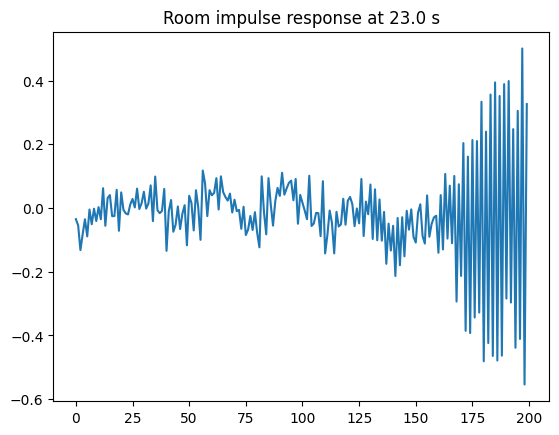

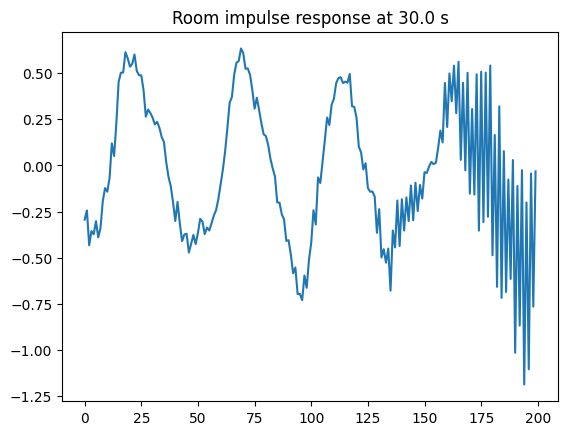

In [78]:
# Apply the iteration
delta = 0.09 # for RLS
lambda_ = 0.3 # for RLS

K = 200  # number of taps
N_it = 5  # number of iterations

f_ad_rls, e_ad_rls = afilter.adaptive_filter(x, d, K, N_it, 
                                            algoType='RLS', lambda_=lambda_, delta=delta, callback=plot_adaptive)

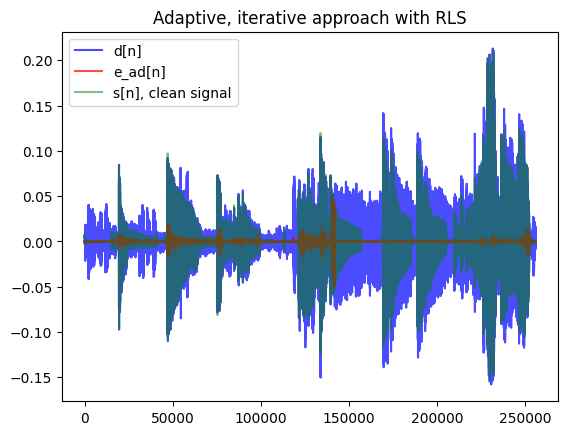

In [79]:
plt.title('Adaptive, iterative approach with RLS')
plt.plot(d, color='blue', label='d[n]', alpha=0.7)
plt.plot(e_ad_rls, color='red', label='e_ad[n]', alpha=0.7)
plt.plot(cleanSig, color='green', label='s[n], clean signal', alpha=0.5)
plt.legend()

In [80]:
print('Denoised signal')
IPython.display.Audio(e_ad_rls, rate=fs)

Denoised signal


In [ ]:
print("Signal corrupted with noise")
IPython.display.Audio(d, rate=fs)